In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [21]:
dataset = pd.read_csv('/content/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
dataset.shape

(1599, 12)

In [23]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
X = dataset.iloc[:,0:-1]
y = dataset['quality']

In [25]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [26]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [27]:
samples

[(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
  92              8.6             0.490         0.29             2.0      0.110   
  1017            8.0             0.180         0.37             0.9      0.049   
  1447            6.8             0.670         0.00             1.9      0.080   
  838            10.1             0.310         0.35             1.6      0.075   
  40              7.3             0.450         0.36             5.9      0.074   
  ...             ...               ...          ...             ...        ...   
  763             9.3             0.655         0.26             2.0      0.096   
  835             7.6             0.665         0.10             1.5      0.066   
  1216            7.9             0.570         0.31             2.0      0.079   
  559            13.0             0.470         0.49             4.3      0.085   
  684             9.8             0.980         0.32             2.3      0.078   
  
 

In [28]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [29]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [30]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.54 Best Kernel =  rbf Best Nu =  1.15 Best Epsilon =  6.76
Best Accuracy =  0.54 Best Kernel =  rbf Best Nu =  3.67 Best Epsilon =  2.96
Best Accuracy =  0.52 Best Kernel =  rbf Best Nu =  8.03 Best Epsilon =  2.4
Best Accuracy =  0.55 Best Kernel =  rbf Best Nu =  7.24 Best Epsilon =  5.49
Best Accuracy =  0.58 Best Kernel =  rbf Best Nu =  2.96 Best Epsilon =  3.05
Best Accuracy =  0.51 Best Kernel =  rbf Best Nu =  0.6 Best Epsilon =  1.93
Best Accuracy =  0.57 Best Kernel =  rbf Best Nu =  4.97 Best Epsilon =  3.04
Best Accuracy =  0.55 Best Kernel =  rbf Best Nu =  4.86 Best Epsilon =  1.19
Best Accuracy =  0.57 Best Kernel =  rbf Best Nu =  3.91 Best Epsilon =  2.45
Best Accuracy =  0.57 Best Kernel =  rbf Best Nu =  7.51 Best Epsilon =  2.5


In [37]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.54,rbf,1.15,6.76
1,2,0.54,rbf,3.67,2.96
2,3,0.52,rbf,8.03,2.40
3,4,0.55,rbf,7.24,5.49
4,5,0.58,rbf,2.96,3.05
5,6,0.51,rbf,0.60,1.93
6,7,0.57,rbf,4.97,3.04
7,8,0.55,rbf,4.86,1.19
8,9,0.57,rbf,3.91,2.45
9,10,0.57,rbf,7.51,2.50


In [32]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [33]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [34]:
train_sizes

array([  10,   30,   50,   71,   91,  111,  132,  152,  172,  193,  213,
        233,  254,  274,  294,  315,  335,  355,  376,  396,  416,  437,
        457,  478,  498,  518,  539,  559,  579,  600,  620,  640,  661,
        681,  701,  722,  742,  762,  783,  803,  823,  844,  864,  884,
        905,  925,  945,  966,  986, 1007])

In [35]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

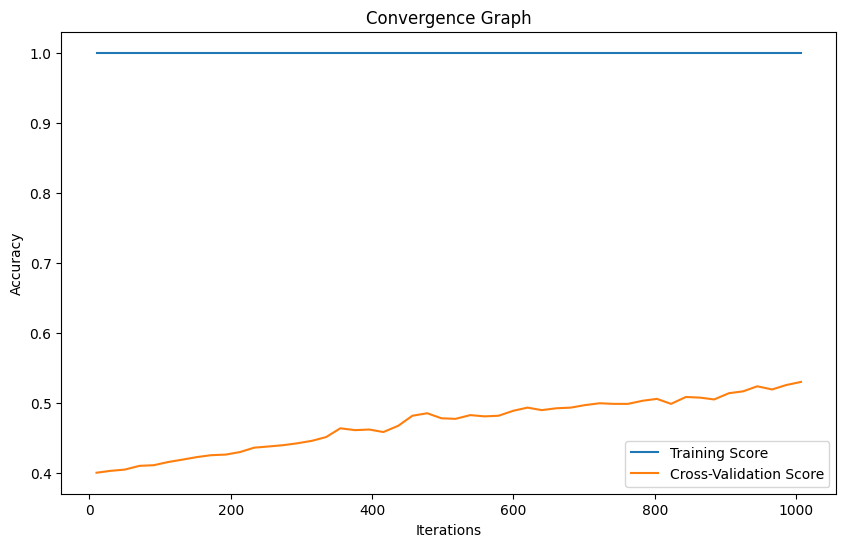

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()
     